# Chapter 4: Lists, Streams (I) and Output

In [2]:
from music21 import*

## Working with multiple objects via Lists

In [3]:
note1 = note.Note("C4")
note2 = note.Note("F#4")
noteList = [note1, note2]

In [4]:
print(noteList)

[<music21.note.Note C>, <music21.note.Note F#>]


In [5]:
for thisNote in noteList:
    print(thisNote.step)

C
F


In [6]:
note3 = note.Note("B-2")
noteList.append(note3)

In [7]:
noteList[-1]
# get the last element of a list

<music21.note.Note B->

Lists don't know anything about music, so for *music21*, **Stream** is better

## Introduction to Streams 

The ***Stream*** object and its subclasses (***Score, Part, Measure***) are the fundamental containers for music21 objects

 one music21 object can be simultaneously stored in more than one *Stream*

## Creating simple Streams

In [8]:
stream1 = stream.Stream()

In [9]:
stream1.append(note1)
stream1.append(note2)
stream1.append(note3)

Use the Stream method ***repeatAppend()*** to add a number of independent, unique copies of the same Note

In [10]:
stream2 = stream.Stream()
n3 = note.Note('D#5')
stream2.repeatAppend(n3,4)
stream2.show('musicxml')

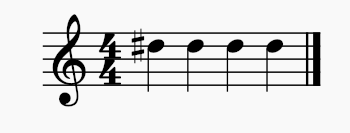

In [16]:
len(stream1)

3

Use *show('text')* to see what is in the Stream and what its offset is

In [17]:
stream1.show('text')

{0.0} <music21.note.Note C>
{1.0} <music21.note.Note F#>
{2.0} <music21.note.Note B->


In [18]:
stream1[0].quarterLength = 2
stream1[0].quarterLength

2.0

In [36]:
stream1.show('musicxml')

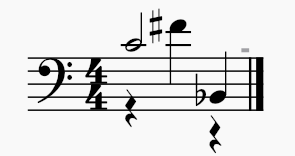

## Accessing Streams 

In [19]:
for thisNote in stream1:
    print(thisNote.step)

C
F
B


In [20]:
note3Index = stream1.index(note3)
note3Index

2

Given an index, an element from the Stream can be **removed** with the *pop()* method.

In [21]:
stream1.pop(note3Index)
stream1.show('musicxml')

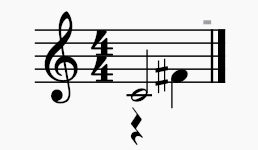

In [22]:
stream1.append(note3)

## Separating out elements by class  

In [23]:
for thisNote in stream1.getElementsByClass(note.Note):
    print(thisNote, thisNote.offset)

<music21.note.Note C> 0.0
<music21.note.Note F#> 1.0
<music21.note.Note B-> 2.0


In [24]:
for thisNote in stream1.getElementsByClass('Note'):
    print(thisNote, thisNote.offset)

<music21.note.Note C> 0.0
<music21.note.Note F#> 1.0
<music21.note.Note B-> 2.0


It is also possible to pass in a list of classes or strings of class names

In [25]:
for thisNote in stream1.getElementsByClass(['Note', 'Rest']):
    print(thisNote, thisNote.offset)
# 此处虽然是多重条件检索，但由于stream1中并无 Rest objects, 因此结果与上述无异。 

<music21.note.Note C> 0.0
<music21.note.Note F#> 1.0
<music21.note.Note B-> 2.0


music21 has a couple of **shortcuts** that are equivalent to *.getElementsByClass*

In [26]:
# .notes is equivalent to .getElementsByClass(['Note', 'Chord'])
for thisNote in stream1.notes:
    print(thisNote)

<music21.note.Note C>
<music21.note.Note F#>
<music21.note.Note B->


In [27]:
# .notesAndRests is equivalent to .getElementsByClass(['Note', 'Chord', 'Rest'])
for thisNote in stream1.notesAndRests:
    print(thisNote)

<music21.note.Note C>
<music21.note.Note F#>
<music21.note.Note B->


In [28]:
listOut = stream1.pitches
listOut

[<music21.pitch.Pitch C4>,
 <music21.pitch.Pitch F#4>,
 <music21.pitch.Pitch B-2>]

In [29]:
# Convert the result of .getElementsByClass to a stream with .stream()
sIterator = stream1.getElementsByClass(note.Note)
sOut = sIterator.stream()
sOut.show('text')

{0.0} <music21.note.Note C>
{1.0} <music21.note.Note F#>
{2.0} <music21.note.Note B->


## Separating out elements by offset 

In [32]:
sOut = stream1.getElementsByOffset(2)
len(sOut)

1

In [33]:
sOut[0]

<music21.note.Note B->

In [36]:
sOut = stream1.getElementsByOffset(1, 2).stream()
sOut.show('text')

{1.0} <music21.note.Note F#>
{2.0} <music21.note.Note B->


## More Stream Features 

 **ambitus** - the range from the lowest note to the highest note

In [38]:
# From B-flat to the F-sharp above it, is an augmented fifth增五度（跨越8个半音）. 
# An augmented fifth plus an octave is an augmented twelfth
stream1.analyze('ambitus')

<music21.interval.Interval A12>

**offset** - describes their position from the beginning of the stream

In [39]:
for thisNote in stream1:
    print(thisNote.offset, thisNote.name)

0.0 C
1.0 F#
2.0 B-


In [40]:
stream1.lowestOffset
# returns the minimum of all offsets for all elements on the Stream

0.0

In [41]:
stream1.show('midi')

In [42]:
stream1

<music21.stream.Stream 0x1a1112d9cd0>

 change the *.id* of a Stream

In [43]:
stream1.id = 'some_notes'
stream1

<music21.stream.Stream some_notes>

**Duration** attributes

In [45]:
stream1.duration

<music21.duration.Duration 3.0>

In [46]:
stream1.duration.quarterLength

3.0

In [47]:
stream1.highestTime
# the time at which the latest element in the end
# the last element of the stream’s .offset plus its .quarterLength

3.0

## Streams within Streams

In [49]:
biggerStream = stream.Stream()
note2 = note.Note("D#5")
biggerStream.insert(0, note2)
biggerStream.show('text')

{0.0} <music21.note.Note D#>


In [50]:
biggerStream.append(stream1)
biggerStream.show('text')

{0.0} <music21.note.Note D#>
{1.0} <music21.stream.Stream some_notes>
    {0.0} <music21.note.Note C>
    {1.0} <music21.note.Note F#>
    {2.0} <music21.note.Note B->


each *Music21Object* knows its offset only in relation to its containing *Stream*

In [51]:
note1 in stream1

True

In [52]:
note1 in biggerStream

False

*note1* knows that it is in *stream1* but doesn’t know that it is somewhere inside *biggerStream*

in music21, ***Scores*** are made up of ***Streams*** within ***Streams*** within ***Streams***.